# Projekt - feature engineering

Dane: https://www.kaggle.com/datasets/prasad22/healthcare-dataset 

Cel biznesowy: Na podstawie danych pacjenta i hospitalizacji ocenić ryzyko ponad przeciętnie wysokiego wyniku badań

Zmienne:
- Name: This column represents the name of the patient associated with the healthcare record.
- Age: The age of the patient at the time of admission, expressed in years.
- Gender: Indicates the gender of the patient, either "Male" or "Female."
- Blood Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).
- Medical Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.
- Date of Admission: The date on which the patient was admitted to the healthcare facility.
- Doctor: The name of the doctor responsible for the patient's care during their admission.
- Hospital: Identifies the healthcare facility or hospital where the patient was admitted.
- Insurance Provider: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."
- Billing Amount: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.
- Room Number: The room number where the patient was accommodated during their admission.
- Admission Type: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.\
- Discharge Date: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.
- Medication: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."
- Test Results: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.

Zadania do wykonania:
1. Usuń ze zbioru przypadki, gdzie wynik testu jest niejednoznaczny (Inconclusive).
2. Wybierz zmienne do modelu. Zastanów się, które mają największy sens biznesowy.
3. Dokonaj enkodingu zmiennych kategorycznych.
4. Dokonaj kategoryzacji jednej, wybranej zmiennej nominalnej.
5. Zbadaj outliery.
6. Sprawdź czy należy bilansować zbiór.
7. Stwórz model klasyfikacyjny.
8. Dokonaj oceny modelu metrykami bazującymi na scoringu.
9. Sprawdź czy należy skalibrować prawdopodobieństwo.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/healthcare_dataset.csv')

1. Usuń ze zbioru przypadki, gdzie wynik testu jest niejednoznaczny (Inconclusive).

In [3]:
df = df[df['Test Results']!= 'Inconclusive'].reset_index(drop=True)

2. Wybierz zmienne do modelu. Zastanów się, które mają największy sens biznesowy.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37144 entries, 0 to 37143
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                37144 non-null  object 
 1   Age                 37144 non-null  int64  
 2   Gender              37144 non-null  object 
 3   Blood Type          37144 non-null  object 
 4   Medical Condition   37144 non-null  object 
 5   Date of Admission   37144 non-null  object 
 6   Doctor              37144 non-null  object 
 7   Hospital            37144 non-null  object 
 8   Insurance Provider  37144 non-null  object 
 9   Billing Amount      37144 non-null  float64
 10  Room Number         37144 non-null  int64  
 11  Admission Type      37144 non-null  object 
 12  Discharge Date      37144 non-null  object 
 13  Medication          37144 non-null  object 
 14  Test Results        37144 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 4.3

In [5]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
2,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
3,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
4,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal


In [6]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [7]:
cols = list(df.select_dtypes(include ='object').columns[1:])
cols

['Gender',
 'Blood Type',
 'Medical Condition',
 'Doctor',
 'Hospital',
 'Insurance Provider',
 'Admission Type',
 'Medication',
 'Test Results']

In [8]:
del cols[cols.index('Doctor')]
del cols[cols.index('Hospital')]
del cols[cols.index('Insurance Provider')]

In [9]:
cols

['Gender',
 'Blood Type',
 'Medical Condition',
 'Admission Type',
 'Medication',
 'Test Results']

In [10]:
numerical_features = ['Age']

3. Dokonaj enkodingu zmiennych kategorycznych.

In [11]:
from sklearn.preprocessing import OrdinalEncoder

In [12]:
oe = OrdinalEncoder().fit(df[cols])

In [13]:
oe.get_feature_names_out()

array(['Gender', 'Blood Type', 'Medical Condition', 'Admission Type',
       'Medication', 'Test Results'], dtype=object)

In [14]:
features_names = [i + '_encoded' for i in oe.get_feature_names_out()]

In [15]:
features_names

['Gender_encoded',
 'Blood Type_encoded',
 'Medical Condition_encoded',
 'Admission Type_encoded',
 'Medication_encoded',
 'Test Results_encoded']

In [16]:
df[features_names] = oe.transform(df[cols])
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Admission Type,Discharge Date,Medication,Test Results,Gender_encoded,Blood Type_encoded,Medical Condition_encoded,Admission Type_encoded,Medication_encoded,Test Results_encoded
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,...,Urgent,2024-02-02,Paracetamol,Normal,1.0,5.0,2.0,2.0,3.0,1.0
1,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,...,Emergency,2022-10-07,Aspirin,Normal,0.0,1.0,5.0,1.0,0.0,1.0
2,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,...,Elective,2020-12-18,Ibuprofen,Abnormal,0.0,6.0,3.0,0.0,1.0,0.0
3,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,...,Urgent,2022-10-09,Penicillin,Abnormal,0.0,2.0,2.0,2.0,4.0,0.0
4,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,...,Urgent,2023-12-24,Ibuprofen,Normal,1.0,0.0,1.0,2.0,1.0,1.0


4. Dokonaj kategoryzacji jednej, wybranej zmiennej nominalnej.

In [17]:
df['length_of_service'] = (df['Discharge Date'] - df['Date of Admission']).astype(int)

In [18]:
numerical_features.append('length_of_service')

In [19]:
from sklearn.preprocessing import KBinsDiscretizer

In [20]:
df['Age_bins'] = KBinsDiscretizer(strategy='quantile', n_bins = 6, encode='ordinal').fit_transform(df[['Age']])

In [21]:
y = features_names[-1]

In [22]:
df[[y, 'Age_bins']].groupby('Age_bins').mean()

,Test Results_encoded
Age_bins,
0.0,0.513392
1.0,0.498757
2.0,0.500695
3.0,0.483547
4.0,0.494983
5.0,0.499619


In [23]:
del features_names[features_names.index(y)]

In [24]:
features_names.append('Age_bins')

5. Zbadaj outliery.

In [25]:
from sklearn.ensemble import IsolationForest

In [26]:
iso_forest = IsolationForest(bootstrap=True).fit(df[features_names +[y]+['length_of_service']])

In [27]:
df['outlier'] = iso_forest.predict(df[features_names +[y]+['length_of_service']])

In [28]:
df.outlier.value_counts()

outlier
-1    37101
 1       43
Name: count, dtype: int64

In [29]:
df_new = df[df['outlier']==-1].reset_index(drop=True)

6. Sprawdź czy należy bilansować zbiór.

In [30]:
df_new['Test Results'].value_counts()

Test Results
Abnormal    18590
Normal      18511
Name: count, dtype: int64

7. Stwórz model klasyfikacyjny.


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [34]:
features_names.append('length_of_srevice')

In [35]:
del features_names[features_names.index('length_of_srevice')]

In [36]:
features_names.append('length_of_service')

In [37]:
train_x, test_x, train_y, test_y = train_test_split(df_new[features_names], df_new[y], test_size= 0.2,random_state=123)

In [38]:
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size= 0.2,random_state=123)

In [39]:
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=20).fit(train_x,train_y)

8. Dokonaj oceny modelu metrykami bazującymi na scoringu.


In [40]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt 
import seaborn as sns

In [41]:
train_pred  = rf.predict_proba(train_x)[:,1]
test_pred = rf.predict_proba(test_x)[:,1]
valid_pred = rf.predict_proba(valid_x)[:,1]

In [45]:
pr_train, recall_train, pr_thresholds_train = precision_recall_curve(train_y, train_pred)
pr_test, recall_test, pr_thresholds_test = precision_recall_curve(test_y, test_pred)

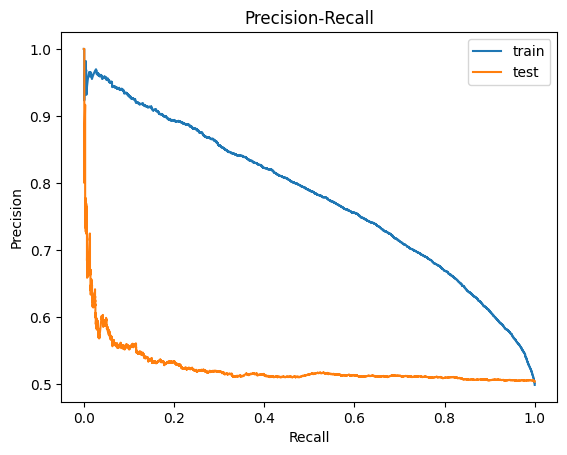

In [46]:
plt.plot(recall_train, pr_train, label= 'train')
plt.plot(recall_test, pr_test, label='test')
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')
plt.show()

9. Sprawdź czy należy skalibrować prawdopodobieństwo.

In [47]:
from sklearn.calibration import calibration_curve, CalibrationDisplay, CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression

In [48]:
cal_cur_train = calibration_curve(train_y, train_pred, n_bins=10, strategy='quantile')
cal_cur_test = calibration_curve(test_y, test_pred, n_bins=10, strategy = 'quantile')

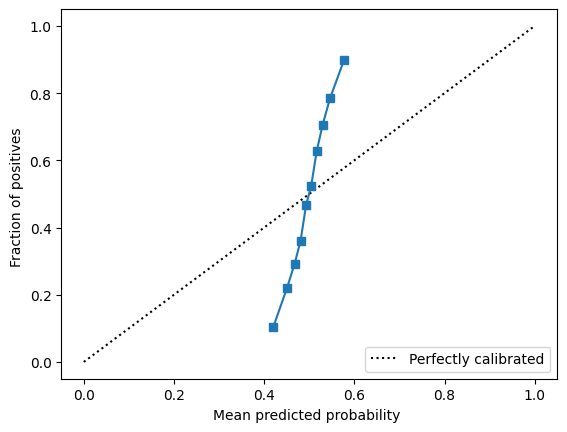

In [50]:
displ = CalibrationDisplay(cal_cur_train[0], cal_cur_train[1], train_y)
displ.plot()

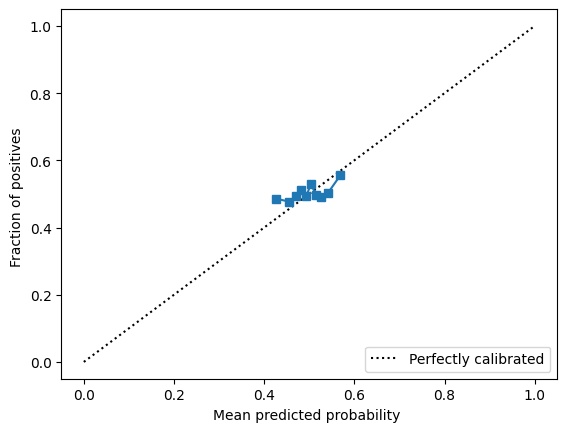

In [51]:
displ = CalibrationDisplay(cal_cur_test[0],cal_cur_test[1],test_y)
displ.plot()
plt.show()

In [53]:
calibration = CalibratedClassifierCV(rf,cv=3, method='sigmoid').fit(test_x, test_y)

In [54]:
test_pred_cal = calibration.predict_proba(test_x)[:,1]
valid_pred_cal = calibration.predict_proba(valid_x)[:,1]

In [56]:
cal_cur_valid = calibration_curve(valid_y, valid_pred_cal, n_bins=10, strategy='quantile')

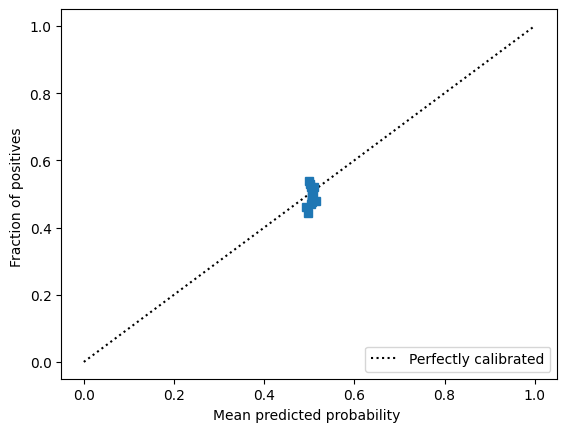

In [57]:
displ = CalibrationDisplay(cal_cur_valid[0], cal_cur_valid[1], valid_y)
displ.plot()

In [58]:
from sklearn.metrics import roc_auc_score

In [59]:
roc_auc_score(valid_y, valid_pred)

np.float64(0.5134381988181288)

In [60]:
roc_auc_score(valid_y, valid_pred_cal)

np.float64(0.5070228099687003)